This section of the capstone project includes exploratory data analysis. The goal of this is to get familiar with the features in my dataset, investigate the relationships between features, and generally understand the core characteristics of my dataset. I know that price will be my dependent vairable that will be the main factor that I will compare everything against.

In [1]:
#Import all the libraries that I might need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#First bring back the file from my data cleaning
cars = pd.read_csv('cars.csv', index_col=0)
cars.head()

,id,price,year,manufacturer,model,cylinders,odometer,transmission,drive,paint_color,state,manufacturer id,model id,cylinders id,transmission id,drive id,color id,state id
0,7184791621,6995,2000.0,gmc,new sierra 1500,8 cylinders,167783.0,automatic,4wd,red,MN,14,11521,8,1,0,9,23
1,7184773187,8750,2013.0,hyundai,sonata,4 cylinders,90821.0,automatic,fwd,grey,MN,17,14842,4,1,2,6,23
2,7193375964,10900,2013.0,toyota,prius,4 cylinders,92800.0,automatic,fwd,blue,CT,39,12299,4,1,2,2,6
4,7184712241,16995,2007.0,gmc,sierra classic 2500hd,8 cylinders,254217.0,automatic,4wd,white,MN,14,14252,8,1,0,11,23
5,7184711787,13995,2012.0,ford,f-150,6 cylinders,188406.0,automatic,4wd,grey,MN,13,6867,6,1,0,6,23


I realized that a majority of my data is categorical, with year and odometer being the only continuous variables.  Those will be the first two factors that I focus on.

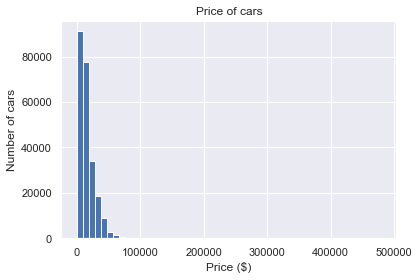

In [3]:
#Let's look at the prices
_ = sns.set()
_ = plt.hist(cars['price'], bins=50)
_ = plt.xlabel('Price ($)')
_ = plt.ylabel('Number of cars')
_ = plt.title('Price of cars')
plt.show()

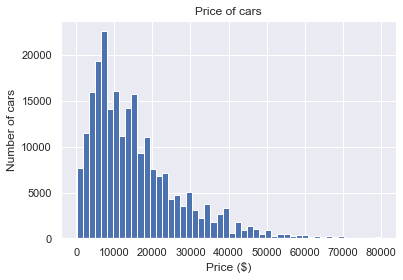

In [4]:
#This histogram is hard to view since a large majority of the prices are under $80,000. I want to look more closely at these.
normal_prices = cars[cars['price']<=80000]
_ = sns.set()
_ = plt.hist(normal_prices['price'], bins=50)
_ = plt.xlabel('Price ($)')
_ = plt.ylabel('Number of cars')
_ = plt.title('Price of cars')
plt.show()

This is good information to see.  It is definietly a right skew.  Most of the cars are cheaper (Under $20000), but there are a lot of factors to take into consideration.  This is not a site where you would expect new cars straight from the manufacturer.  I would expect that most of these cars are used, which typically comes with a decreased value.  An ECDF would be a great way to visualize this information.

In [5]:
#Set up an ECDF function that can be used multiple times and graphed.
def ecdf(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1, n+1) / n
    return x, y

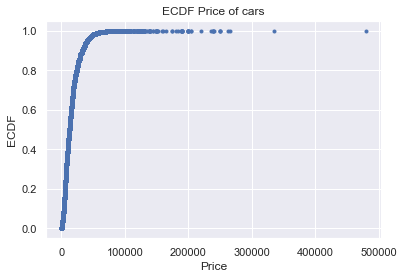

In [6]:
#Lets see how the ecdf works on price
x_price, y_price = ecdf(cars['price'])
_ = plt.plot(x_price, y_price, marker='.',linestyle='none')
_ = plt.xlabel('Price')
_ = plt.ylabel('ECDF')
_ = plt.title('ECDF Price of cars')

Unfortunately (or furtunately, depending on how you look at it, these results make me think that it might be a good idea to do some more data cleaning.  A handful of these prices are drastic extremes that are throwing the results off a lot, and they are so rare that they would not be very useful in developing a predictive model.  Therefore I am going to delete more price outliers to get more consistent data.

In [7]:
expensive_cars=cars[cars['price']>125000]
expensive_cars.count()


id                 80
price              80
year               80
manufacturer       80
model              80
cylinders          80
odometer           80
transmission       80
drive              80
paint_color        80
state              80
manufacturer id    80
model id           80
cylinders id       80
transmission id    80
drive id           80
color id           80
state id           80
dtype: int64

In [8]:
#I want to check to see if any of there are a lot of any single type of car that is over $125,000.  If there is not a lot of a specific car model, then it would be difficult to make an effective model to predict its price, and I feel safe deleting them
multiple_cars_over_125k = expensive_cars['model'].value_counts() > 5
multiple_cars_over_125k[multiple_cars_over_125k == True].count()


0

I do not feel bad about removing the 80 cars that are over $125,000 since there are only 80, and there are none that have more than 5 specific models

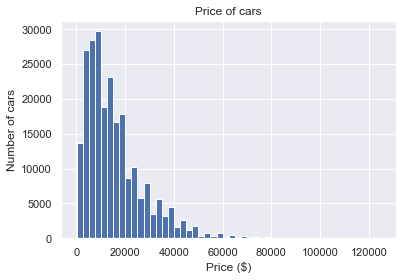

In [9]:
cars = cars[cars['price']<=125000]

_ = sns.set()
_ = plt.hist(cars['price'], bins=50)
_ = plt.xlabel('Price ($)')
_ = plt.ylabel('Number of cars')
_ = plt.title('Price of cars')
plt.show()

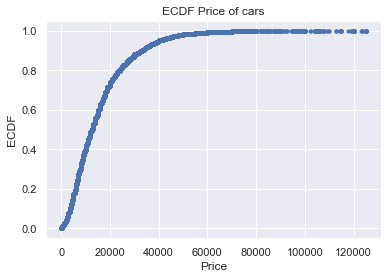

In [10]:
x_price, y_price = ecdf(cars['price'])
_ = plt.plot(x_price, y_price, marker='.',linestyle='none')
_ = plt.xlabel('Price')
_ = plt.ylabel('ECDF')
_ = plt.title('ECDF Price of cars')

Almost all of the cars have a price under 60,000, with about 75 percent being under 20000

In [11]:
cars['price'].describe()

count    235846.000000
mean      15782.269578
std       12601.662641
min         101.000000
25%        6900.000000
50%       12750.000000
75%       20980.000000
max      125000.000000
Name: price, dtype: float64

Now it's time to do some comparisons.  I do not have many values that are not categorical, so I want to find out everything I can about them first.  Year and mileage('odometer') will likely be my most important values, so that is where I will put a lot of focus.  I'll start with some visualization of correlations.

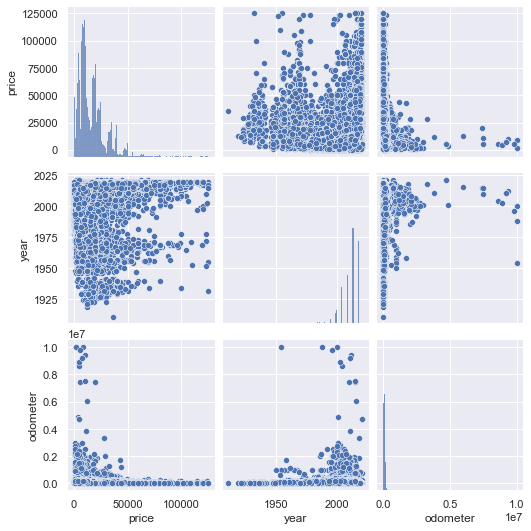

In [12]:
sns.pairplot(cars[['price','year','odometer']])

I immediately see a potential issue with odometer.  It looks like a lot of the values are at or near 0.  It could be difficult to tell the difference between cars that are really that low in mileage and cars that were incorrectly given a low value.  I have trouble believing so many cars before 1950 have no mileage on them.  This might lead to more data cleaning, or odometer might be limited in its usefulness, but I don't want to remove cars that have 0 mileage.. I will have to look more into this.

The year and price comparison is very difficult to tell an immediate correlation.  I see another issue with year in which will require data clearning.  I don't think there are any cars that are created in 2021 or later.  The years need some work.  I am quickly learning that once I get into EDA, this makes me realize I didn't clean the data as much as I should have.  This was a pretty messy database.

In [13]:
cars[cars['year']>2020].count()

id                 55
price              55
year               55
manufacturer       55
model              55
cylinders          55
odometer           55
transmission       55
drive              55
paint_color        55
state              55
manufacturer id    55
model id           55
cylinders id       55
transmission id    55
drive id           55
color id           55
state id           55
dtype: int64

In [14]:
cars = cars[cars['year']<=2020]

In [15]:
cars[cars['year']<=1930]

,id,price,year,manufacturer,model,cylinders,odometer,transmission,drive,paint_color,state,manufacturer id,model id,cylinders id,transmission id,drive id,color id,state id
1670,7194812370,23980,1927.0,ford,roadster,Unknown,7188.0,automatic,Unknown,orange,NM,13,13115,2,1,1,7,32
10641,7185770086,12500,1919.0,ford,depot,Unknown,100.0,manual,Unknown,Unknown,OR,13,5358,2,2,1,0,37
21945,7180225020,20000,1930.0,ford,model a coupe,Unknown,300.0,manual,Unknown,Unknown,LA,13,11181,2,2,1,0,18
27827,7189649705,19995,1927.0,ford,t bucket,8 cylinders,1000.0,automatic,rwd,red,OK,13,15466,8,1,3,9,36
35005,7179919774,31900,1929.0,ford,model a,8 cylinders,20000.0,automatic,rwd,orange,OH,13,11179,8,1,3,7,35
40428,7189094874,17500,1927.0,ford,model-t roadster pu,8 cylinders,824.0,manual,rwd,black,OR,13,11214,8,2,3,1,37
41217,7194597270,21000,1930.0,ford,model aa,4 cylinders,73000.0,manual,rwd,green,NY,13,11186,4,2,3,5,34
51915,7192725431,13300,1923.0,ford,t-bucket,8 cylinders,50.0,automatic,rwd,orange,ME,13,15477,8,1,3,7,21
78466,7183707852,11995,1921.0,dodge,- pickup,4 cylinders,2632.0,manual,rwd,Unknown,WA,10,10,4,2,3,0,47
99964,7188033615,32500,1929.0,ford,model a hiboy roadster,8 cylinders,12500.0,manual,rwd,orange,PA,13,11183,8,2,3,7,38


I did a decent amount of googling of some of these older cars, mostly below 1950, and I didn't see any that seemed out of place(although I didn't go through all of them), so I will keep these in place.

In [16]:
cars[cars['odometer']<=200].count()

id                 3583
price              3583
year               3583
manufacturer       3583
model              3583
cylinders          3583
odometer           3583
transmission       3583
drive              3583
paint_color        3583
state              3583
manufacturer id    3583
model id           3583
cylinders id       3583
transmission id    3583
drive id           3583
color id           3583
state id           3583
dtype: int64

In [17]:
no_miles= cars[cars['odometer']==0]
no_miles.count()

id                 749
price              749
year               749
manufacturer       749
model              749
cylinders          749
odometer           749
transmission       749
drive              749
paint_color        749
state              749
manufacturer id    749
model id           749
cylinders id       749
transmission id    749
drive id           749
color id           749
state id           749
dtype: int64

In [18]:
no_miles

,id,price,year,manufacturer,model,cylinders,odometer,transmission,drive,paint_color,state,manufacturer id,model id,cylinders id,transmission id,drive id,color id,state id
954,7186243276,12000,1952.0,gmc,panel truck,Unknown,0.0,automatic,Unknown,Unknown,WA,14,11933,2,1,1,0,47
1694,7194775669,17815,2020.0,nissan,versa,Unknown,0.0,automatic,fwd,Unknown,NM,31,16817,2,1,2,0,32
1697,7194768936,17815,2020.0,nissan,versa,Unknown,0.0,automatic,fwd,black,NM,31,16817,2,1,2,1,32
1709,7194762534,17815,2020.0,nissan,versa,Unknown,0.0,automatic,fwd,Unknown,NM,31,16817,2,1,2,0,32
1711,7194760211,17815,2020.0,nissan,versa,Unknown,0.0,automatic,fwd,silver,NM,31,16817,2,1,2,10,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420185,7186953453,6500,1962.0,volkswagen,bug,Unknown,0.0,manual,Unknown,grey,VA,40,3124,2,2,1,6,45
420612,7181386937,13900,2013.0,chevrolet,camaro,6 cylinders,0.0,automatic,rwd,blue,FL,7,3412,6,1,3,2,9
420630,7186005802,3800,2002.0,honda,cr-v ex,4 cylinders,0.0,automatic,4wd,black,VA,16,4715,4,1,0,1,45
420632,7186004459,15000,1988.0,jeep,yj,8 cylinders,0.0,automatic,4wd,white,VA,20,17631,8,1,0,11,45


In [19]:
cars[cars['odometer']<=1000].count()

id                 4243
price              4243
year               4243
manufacturer       4243
model              4243
cylinders          4243
odometer           4243
transmission       4243
drive              4243
paint_color        4243
state              4243
manufacturer id    4243
model id           4243
cylinders id       4243
transmission id    4243
drive id           4243
color id           4243
state id           4243
dtype: int64

Mileage is one of the major factors I am using to predict price, so I decided that I am going to remove those with mileage that is too low to be reliable.  After a little research, I found out that vehicles can still have quite a lot of miles (even above 1,000) and still be considered new off of the lot.  I am going to go with 1000 as my cutoff, since it still leaves me with plenty of data. I also noticed that some vehicles listed have some extremely high mileage, so I am going to remove those as well.

In [20]:
cars = cars[cars['odometer']>= 1000]
cars = cars[cars['odometer'] <150000]

cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183514 entries, 1 to 423851
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               183514 non-null  int64  
 1   price            183514 non-null  int64  
 2   year             183514 non-null  float64
 3   manufacturer     183514 non-null  object 
 4   model            183514 non-null  object 
 5   cylinders        183514 non-null  object 
 6   odometer         183514 non-null  float64
 7   transmission     183514 non-null  object 
 8   drive            183514 non-null  object 
 9   paint_color      183514 non-null  object 
 10  state            183514 non-null  object 
 11  manufacturer id  183514 non-null  int64  
 12  model id         183514 non-null  int64  
 13  cylinders id     183514 non-null  int64  
 14  transmission id  183514 non-null  int64  
 15  drive id         183514 non-null  int64  
 16  color id         183514 non-null  int6

After more data cleaning, it is worth it to look at the new histogram and ecdf of price.

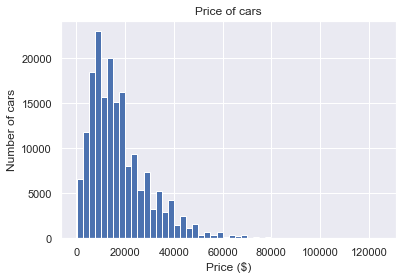

In [21]:
_ = sns.set()
_ = plt.hist(cars['price'], bins=50)
_ = plt.xlabel('Price ($)')
_ = plt.ylabel('Number of cars')
_ = plt.title('Price of cars')
plt.show()

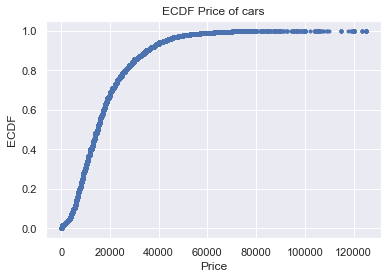

In [22]:
x_price, y_price = ecdf(cars['price'])
_ = plt.plot(x_price, y_price, marker='.',linestyle='none')
_ = plt.xlabel('Price')
_ = plt.ylabel('ECDF')
_ = plt.title('ECDF Price of cars')

I will try bootstrapping the price 50 times to see if the prices were taken randomly, it would change from what is seen.

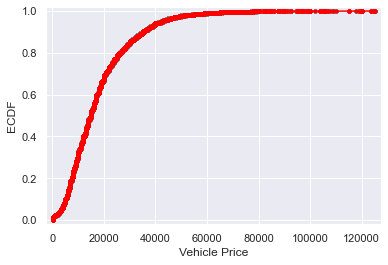

In [23]:
for _ in range(50):
    bs_sample = np.random.choice(cars['price'], size=len(cars['price']))
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none', color='gray', alpha=0.1)

x, y = ecdf(cars['price'])
_ = plt.plot(x, y, marker='.', color='red')

plt.margins(0.02)
_ = plt.xlabel('Vehicle Price')
_ = plt.ylabel('ECDF')

plt.show()

There is so much data already that bootstrapping would not show a significant difference.

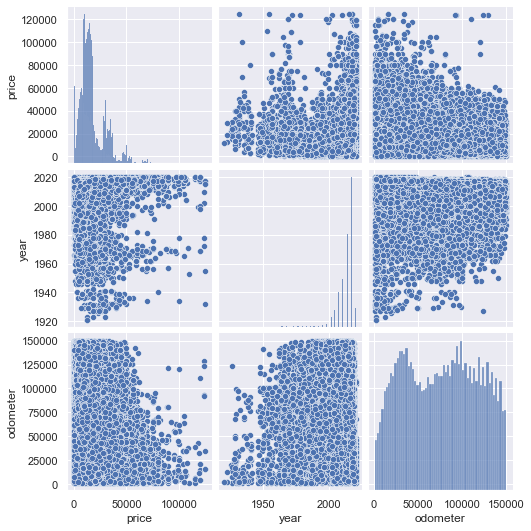

In [24]:
sns.pairplot(cars[['price','year','odometer']])

There are still so many data points that it is difficult to see a trend.  There almost seems to be an inverse relationship between price and mileage, which is expected.  Year and price do not seem to be as correlated.  A correlation heatmap might help.

<AxesSubplot:>

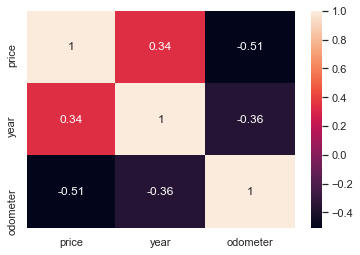

In [25]:
sns.heatmap(cars[['price','year','odometer']].corr(), annot=True)

This shows a little bit more promise.  While none of the correlations are extremely strong, the positive and negative correlation are what are expected.  As the year is more current, price increases, and as mileage increases, price decreases.  The correlation between year and price not being very strong can possibly be due to older, more rare cars having an increased value.  I will go a little deeper with year and mileage vs. price.

slope = 0.00019459870384816558
intercept = 2008.867907225622


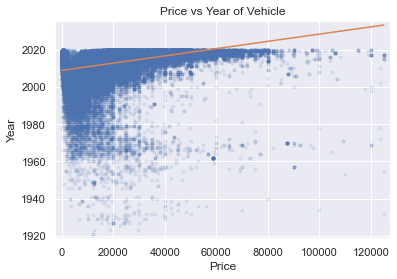

In [26]:
#Take a look at the linear regression model of the data comparing price to year and price to mileage to see how it looks.
plt.plot(cars['price'],cars['year'], marker = '.', linestyle='none', alpha=0.1)
plt.margins(0.02)
plt.xlabel('Price')
plt.ylabel('Year')
plt.title('Price vs Year of Vehicle')

a, b = np.polyfit(cars['price'],cars['year'],1)
print('slope =', a)
print('intercept =', b)
x = np.array([0,125000])
y = a * x + b
_ = plt.plot(x, y)

plt.show()


The slope is low, but over a wide range of prices, it is more apparent, and what I immediately notice is that it can be possibly useful for predictions for future years.  This is one of those rare occasions where having a line of best fit that goes out of the range of the data having potential use.

slope = -1.6389820180225727
intercept = 105492.40860387342


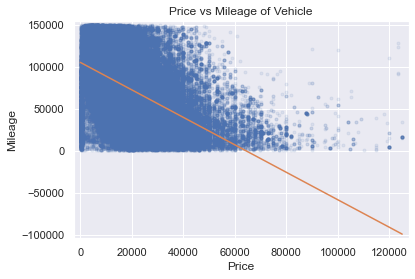

In [27]:
plt.plot(cars['price'],cars['odometer'], marker = '.', linestyle='none', alpha=0.1)
plt.margins(0.02)
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.title('Price vs Mileage of Vehicle')

a, b = np.polyfit(cars['price'],cars['odometer'],1)
print('slope =', a)
print('intercept =', b)
x = np.array([0,125000])
y = a * x + b
_ = plt.plot(x, y)

plt.show()

This slope is definitely more prominent, showing price increasing the less the car is driven.  Cars that have high mileage are cheaper.

How does mileage and year compare? It should be a pretty obvious conclusion, but worth looking at.

slope = -2009.3998157467202
intercept = 4119963.8041974483


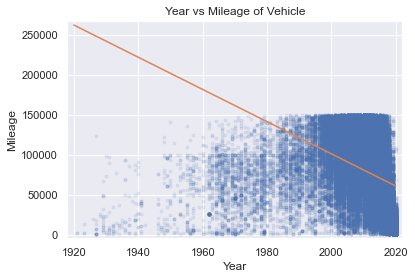

In [28]:
plt.plot(cars['year'],cars['odometer'], marker = '.', linestyle='none', alpha=0.1)
plt.margins(0.02)
plt.xlabel('Year')
plt.ylabel('Mileage')
plt.title('Year vs Mileage of Vehicle')

a, b = np.polyfit(cars['year'],cars['odometer'],1)
print('slope =', a)
print('intercept =', b)
x = np.array([1920,2020])
y = a * x + b
_ = plt.plot(x, y)

plt.show()

It is worth investigating the other varables versus price as well.  We will start with looking at a few that will be easier to evaluate.  Other than the unknown, cylinders_id matches the number of cylinders the car has, so those numbers can be used, and transmission is either manual or automatic, so it can be treated as a binomial.  We will eliminate the unknown and other values since they will not contribute to the information.

In [29]:
cars['cylinders id known'] =cars['cylinders id'].replace({1:None,2:None})

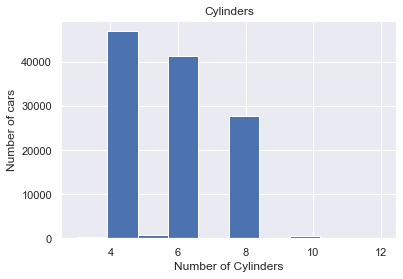

In [30]:
_ = sns.set()
_ = plt.hist(cars['cylinders id known'])
_ = plt.xlabel('Number of Cylinders')
_ = plt.ylabel('Number of cars')
_ = plt.title('Cylinders')

Text(0.5, 1.0, 'Price vs Number of Cylinders')

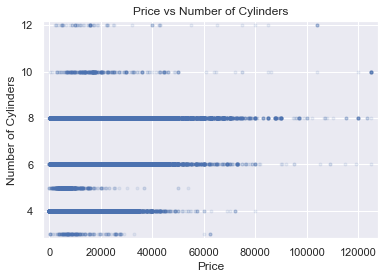

In [31]:
plt.plot(cars['price'],cars['cylinders id known'], marker = '.', linestyle='none', alpha=0.1)
plt.margins(0.02)
plt.xlabel('Price')
plt.ylabel('Number of Cylinders')
plt.title('Price vs Number of Cylinders')

In [32]:
cars['cylinders id known'].value_counts()

4.0     47011
6.0     41488
8.0     27737
5.0       822
10.0      417
3.0       220
12.0       78
Name: cylinders id known, dtype: int64

Most of the values are 4 cylinders or 6 cylinders, with 8 cylinders having the widest range of price.  I'm curious if 4, 6, or 8 cylinders will affect price.  This is a chance to do some hypothesis testing.  I'll test the null hypothesis that cylinder count does not affect the price.  I will have to set up a permutation sample, then test the means to see how much it would change if the prices were randomly permutated. I'll compare each.

In each scenario my goal is to find the p-value of each situation. I am combing the mean prices from each specific situation, mixing them up, and then randomly placing them back into the data (this is the permutation function).  I will then use that function and repeat it many times.  I will see how many of these samples have a mean price difference greater than the actual value I have.  The percentage that is greater is the p-value, and if it is very low (less than 0.05), then supports the idea that my null hypothesis is incorrect. 

In [33]:
#permutation sample
def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)

    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [34]:
#Set up a function to draw multiple permutation samples
def draw_perm_reps(data_1, data_2, func, size=1):
    perm_replicates = np.empty(size)

    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

In [35]:
cylinders_4 = cars[cars['cylinders id']==4.0]['price']
cylinders_6 = cars[cars['cylinders id']==6.0]['price']
cylinders_8 = cars[cars['cylinders id']==8.0]['price']

In [36]:
#Find the differences in the means, and find the p value.
def diff_of_means(data_1, data_2):
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

empirical_diff_means = diff_of_means(cylinders_4,cylinders_6)

perm_replicates = draw_perm_reps(cylinders_4, cylinders_6,
                                 diff_of_means, size=10000)

# Compute p-value
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

print('p-value =', p)

p-value = 1.0


In [37]:
empirical_diff_means_2 = diff_of_means(cylinders_6, cylinders_8)
perm_replicates_2 = draw_perm_reps(cylinders_6, cylinders_8,
                                 diff_of_means, size=10000)

p2 = np.sum(perm_replicates_2 >= empirical_diff_means_2) / len(perm_replicates_2)

print('p-value =', p2)

p-value = 1.0


In [38]:
empirical_diff_means_3 = diff_of_means(cylinders_4, cylinders_8)
perm_replicates_3 = draw_perm_reps(cylinders_4, cylinders_8,
                                 diff_of_means, size=10000)

p3 = np.sum(perm_replicates_3 >= empirical_diff_means_3) / len(perm_replicates_3)

print('p-value =', p3)

p-value = 1.0


This high p-value shows that the null hypothesis is true.  It seems that number of cylinders does not have a strong correlation with price. Having such a large amount of data with a wide range of information seems to reduce a lot of trends.  Now time to check transmission.  Since it does not have a numerical value, calculating p-value would not be useful, but we will look at graphs of the data.

In [39]:
cars['transmission id'].value_counts()
#1 is automatic, 2 is manual.  The other two are unknown, we will ignore those

1    163762
2     10239
3      8683
0       830
Name: transmission id, dtype: int64

Text(0.5, 1.0, 'Price vs Transmission')

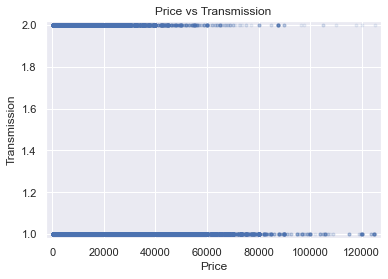

In [40]:
cars['transmission id known'] =cars['transmission id'].replace({3:None,0:None})
plt.plot(cars['price'],cars['transmission id known'], marker = '.', linestyle='none', alpha=0.1)
plt.margins(0.02)
plt.xlabel('Price')
plt.ylabel('Transmission')
plt.title('Price vs Transmission')

There are so many values that it is hard to tell, but initially there seems to be a higher price with automatic transmission.  The next test will be on front wheel drive vs rear wheel drive vs four wheel drive. The null hypothesis is that drive does not affect price.

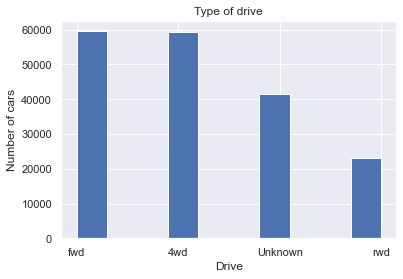

In [41]:
_ = sns.set()
_ = plt.hist(cars['drive'])
_ = plt.xlabel('Drive')
_ = plt.ylabel('Number of cars')
_ = plt.title('Type of drive')
plt.show()

In [42]:
cars['drive id'].value_counts()

2    59536
0    59343
1    41463
3    23172
Name: drive id, dtype: int64

In [43]:
front_wheel = cars[cars['drive id']==2]['price']
four_wheel = cars[cars['drive id']==0]['price']
rear_wheel = cars[cars['drive id']==3]['price']

In [44]:
empirical_diff_means_drive_1 = diff_of_means(front_wheel, four_wheel)
perm_replicates_drive_1 = draw_perm_reps(front_wheel, four_wheel,
                                 diff_of_means, size=10000)

p_drive_1 = np.sum(perm_replicates_drive_1 >= empirical_diff_means_drive_1) / len(perm_replicates_drive_1)

print('p-value =', p_drive_1)

p-value = 1.0


In [45]:
empirical_diff_means_drive_2 = diff_of_means(rear_wheel, four_wheel)
perm_replicates_drive_2 = draw_perm_reps(rear_wheel, four_wheel,
                                 diff_of_means, size=10000)

p_drive_2 = np.sum(perm_replicates_drive_2 >= empirical_diff_means_drive_2) / len(perm_replicates_drive_2)

print('p-value =', p_drive_2)

p-value = 1.0


In [46]:
empirical_diff_means_drive_3 = diff_of_means(front_wheel, rear_wheel)
perm_replicates_drive_3 = draw_perm_reps(front_wheel, rear_wheel,
                                 diff_of_means, size=10000)

p_drive_3 = np.sum(perm_replicates_drive_3 >= empirical_diff_means_drive_3) / len(perm_replicates_drive_3)

print('p-value =', p_drive_3)

p-value = 1.0


The null hypthesis is supported with the high p-value.  Drive does not seem to be a factor on price. The next thing that will be viewed will be state.  It would take too long to compare every state, but perhaps comparing states with the most values will give a good result.

In [47]:
cars['state'].value_counts()

CA    16900
FL    11970
TX     8449
OH     8334
NY     8311
MI     7778
WA     7023
OR     6708
WI     6564
NC     5870
PA     5859
NJ     5465
ID     5069
TN     4979
VA     4823
CO     4807
IA     4382
MT     4226
IL     3601
MA     3462
MN     2981
IN     2977
AZ     2751
AK     2744
SC     2545
CT     2529
OK     2429
AL     2392
KY     2379
MD     2363
KS     2234
MO     2026
AR     1738
GA     1626
NM     1602
NV     1514
NH     1460
VT     1319
RI     1227
ME     1176
DC     1158
LA     1129
HI     1104
SD      776
NE      561
MS      514
UT      501
DE      377
WY      312
WV      262
ND      228
Name: state, dtype: int64

In [48]:
california = cars[cars['state']=='CA']['price']
florida = cars[cars['state']=='FL']['price']

empirical_diff_means_states = diff_of_means(california, florida)
perm_replicates_drive_states = draw_perm_reps(california, florida,
                                 diff_of_means, size=100000)

p_drive_states = np.sum(perm_replicates_drive_states >= empirical_diff_means_states) / len(perm_replicates_drive_states)

print('p-value =', p_drive_states)

p-value = 0.0


Interesting, it has a low p-value.  State might be a factor.  It's worth comparing a few more p-values.

In [49]:
texas = cars[cars['state']=='TX']['price']
ohio = cars[cars['state']=='OH']['price']

empirical_diff_means_states_2 = diff_of_means(texas, ohio)
perm_replicates_drive_states_2 = draw_perm_reps(texas, ohio,
                                 diff_of_means, size=10000)

p_drive_states_2 = np.sum(perm_replicates_drive_states_2 >= empirical_diff_means_states_2) / len(perm_replicates_drive_states_2)

print('p-value =', p_drive_states_2)

p-value = 0.0


Text(0.5, 1.0, 'Price vs State')

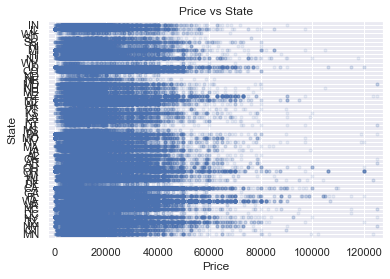

In [50]:
plt.plot(cars['price'],cars['state'], marker = '.', linestyle='none', alpha=0.1)
plt.rcParams["figure.figsize"] = [30,40]
plt.margins(0.02)
plt.xlabel('Price')
plt.ylabel('State')
plt.title('Price vs State')

State will be a factor that is taken into consideration when modeling, with a quick glance looking like coastal cars might be more. Next that will be taken into consideration is color.  It will be factored very similar to state.  The null hypothesis is that color does not have a factor in price.

In [51]:
cars['paint_color'].value_counts()

Unknown    44936
white      34719
black      29129
silver     20978
blue       14231
grey       14103
red        13759
custom      4159
green       2791
brown       2535
orange       938
yellow       902
purple       334
Name: paint_color, dtype: int64

In [52]:
#Will compare white, black, and silver
white = cars[cars['paint_color']=='white']['price']
black = cars[cars['paint_color']=='black']['price']
silver = cars[cars['paint_color']=='silver']['price']

In [53]:
empirical_diff_means_color = diff_of_means(white, black)
perm_replicates_drive_color = draw_perm_reps(white, black,
                                 diff_of_means, size=10000)

p_drive_color = np.sum(perm_replicates_drive_color >= empirical_diff_means_color) / len(perm_replicates_drive_color)

print('p-value =', p_drive_color)

p-value = 0.0


In [54]:
empirical_diff_means_color_2 = diff_of_means(white, silver)
perm_replicates_drive_color_2 = draw_perm_reps(white, silver,
                                 diff_of_means, size=10000)

p_drive_color_2 = np.sum(perm_replicates_drive_color_2 >= empirical_diff_means_color_2) / len(perm_replicates_drive_color_2)

print('p-value =', p_drive_color_2)

p-value = 0.0


In [55]:
empirical_diff_means_color_3 = diff_of_means(black, silver)
perm_replicates_drive_color_3 = draw_perm_reps(black, silver,
                                 diff_of_means, size=10000)

p_drive_color_3 = np.sum(perm_replicates_drive_color_2 >= empirical_diff_means_color_2) / len(perm_replicates_drive_color_2)

print('p-value =', p_drive_color_3)

p-value = 0.0


Text(0.5, 1.0, 'Price vs Color')

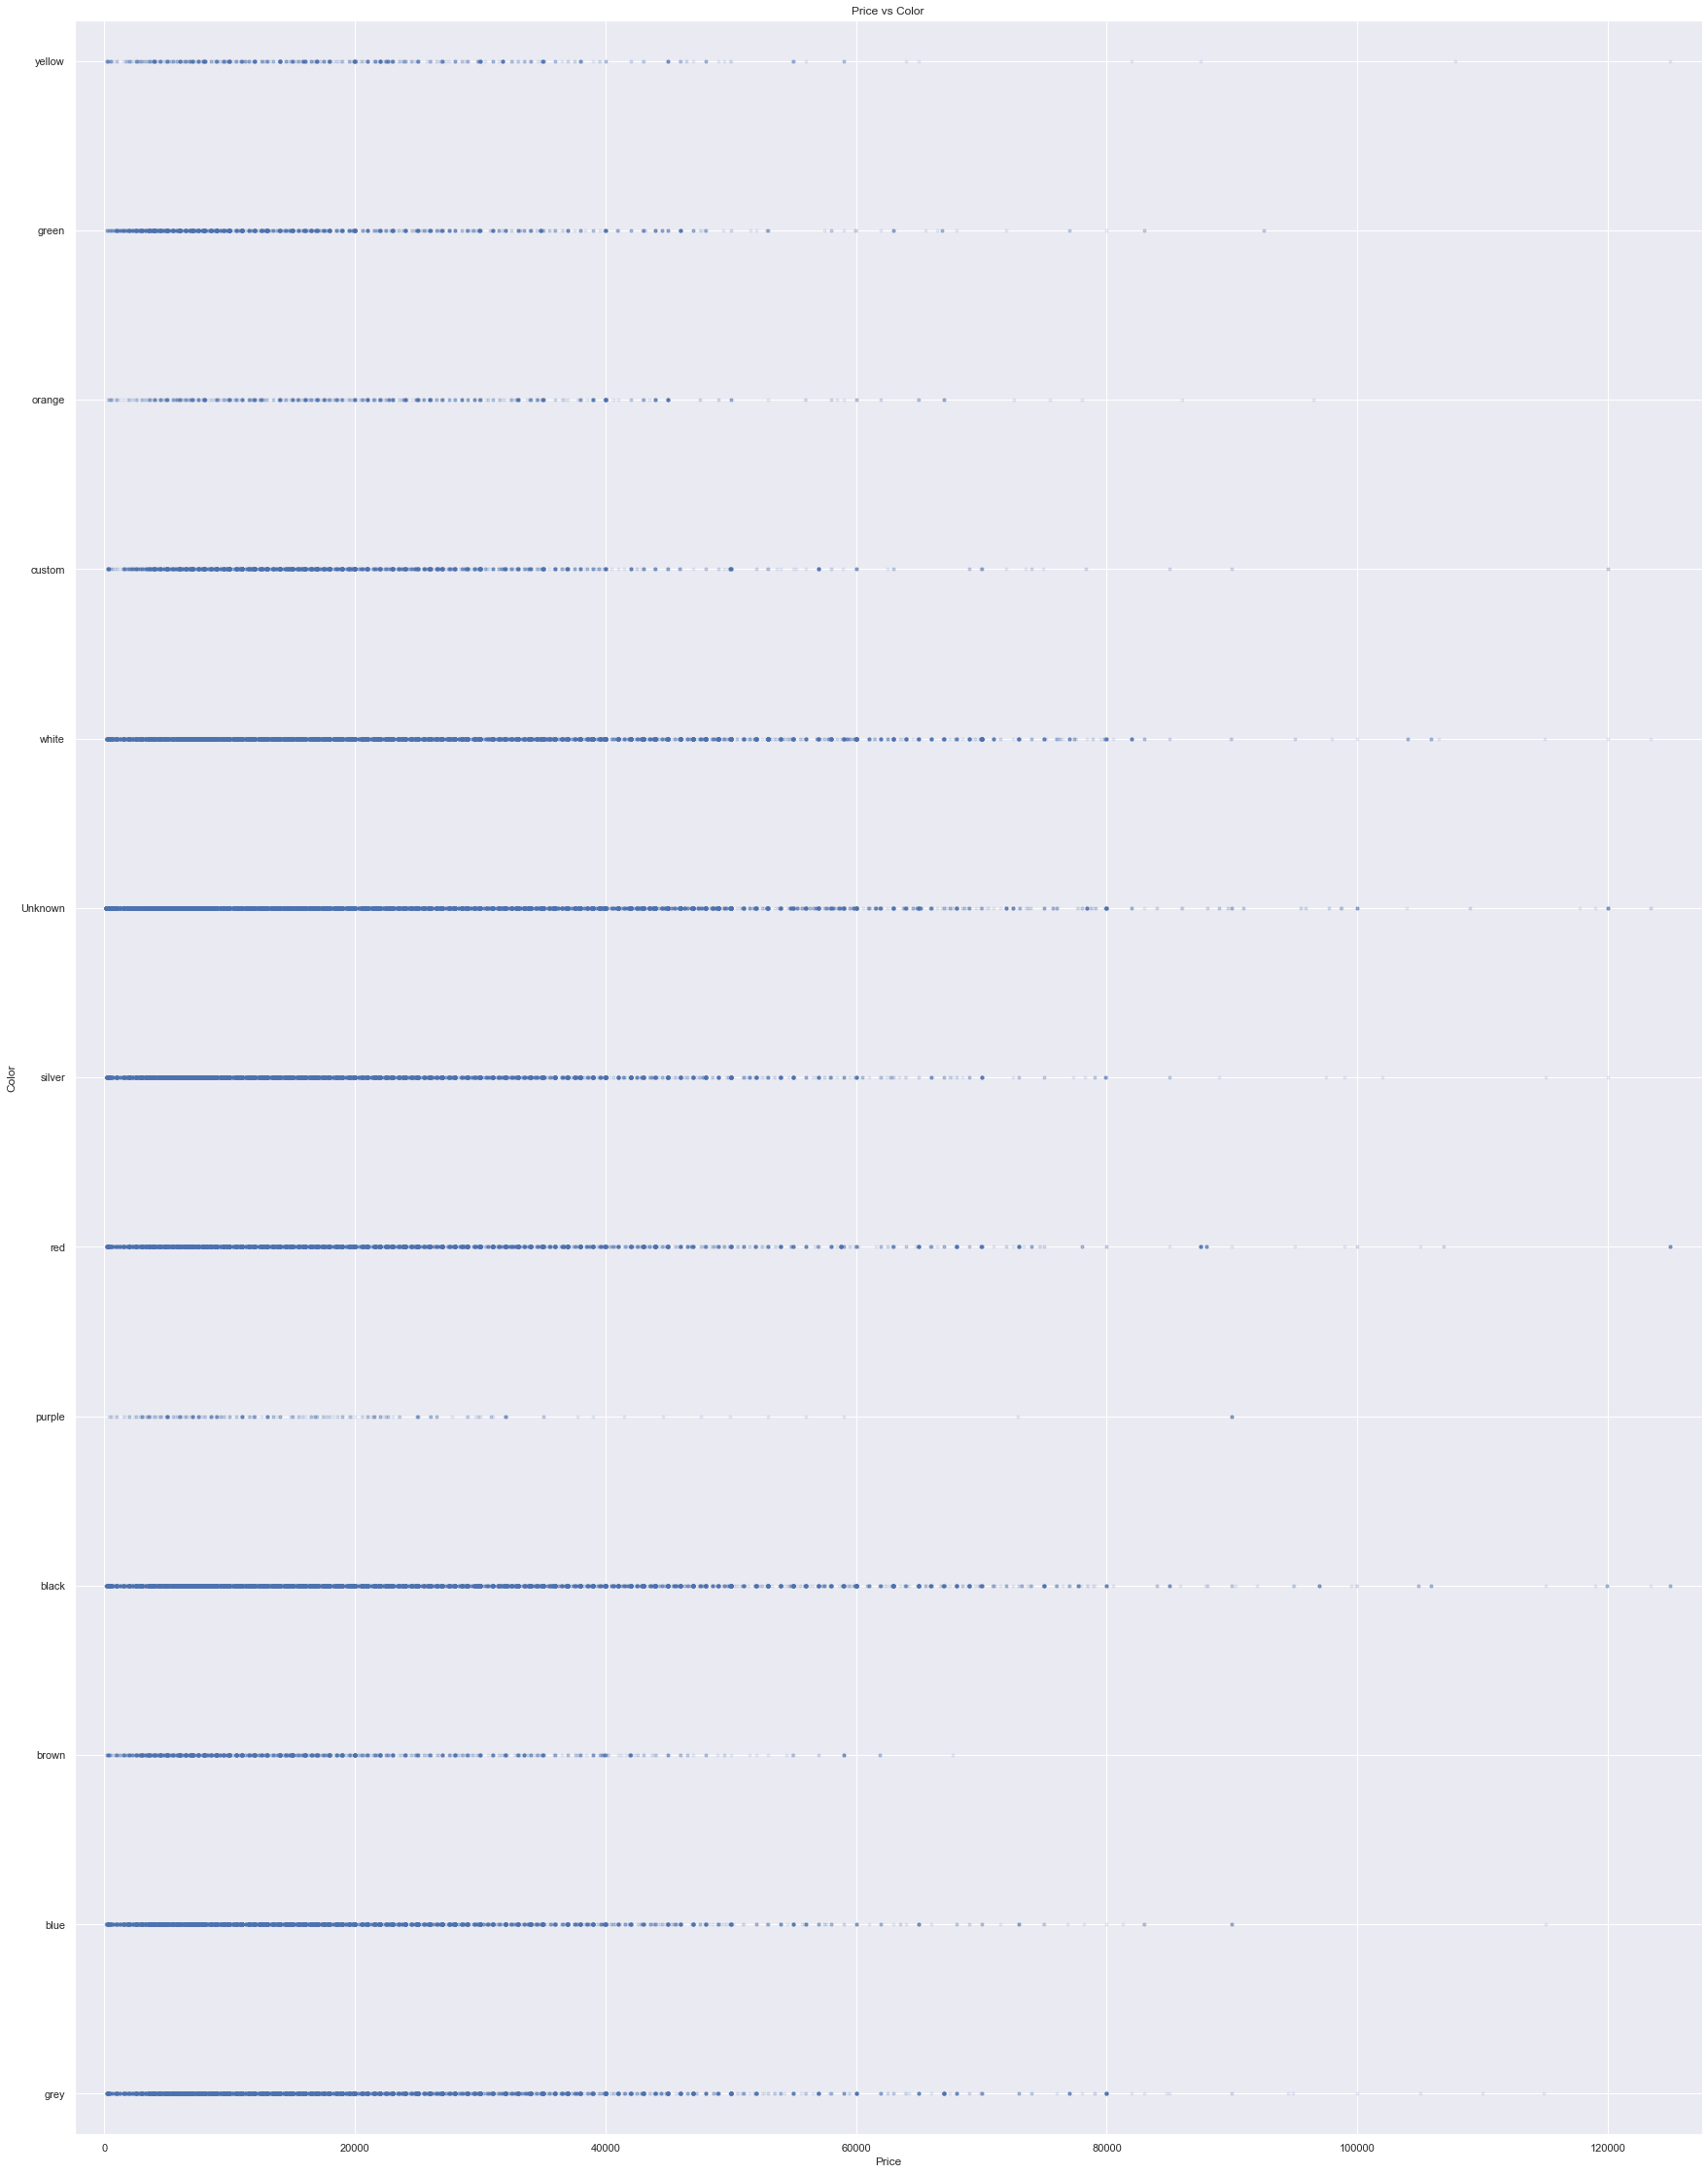

In [56]:
plt.plot(cars['price'],cars['paint_color'], marker = '.', linestyle='none', alpha=0.1)
plt.margins(0.02)
plt.xlabel('Price')
plt.ylabel('Color')
plt.title('Price vs Color')

Color looks to have an impact on price and will be factored in the modeling, with black likely the most valuable.  The next value that will be looked at is manufacturer.  We will go through the same process, where the null hypothesis is manufacturer will not affect price.

In [57]:
cars['manufacturer'].value_counts()

ford               33588
chevrolet          25718
toyota             14121
nissan             11250
honda              10017
jeep                8713
dodge               7365
gmc                 6876
ram                 6175
hyundai             5842
bmw                 5452
subaru              5329
volkswagen          4935
kia                 4720
mercedes-benz       4636
chrysler            3497
cadillac            3050
buick               2925
mazda               2488
audi                2369
lexus               2295
lincoln             1606
acura               1550
infiniti            1474
volvo               1083
mitsubishi          1063
pontiac             1021
mini                1014
rover                724
mercury              630
jaguar               564
saturn               464
fiat                 407
tesla                260
alfa-romeo           116
harley-davidson       77
ferrari               34
datsun                31
aston-martin          25
land rover             5


In [58]:
ford = cars[cars['manufacturer']=='ford']['price']
chevrolet = cars[cars['manufacturer']=='chevrolet']['price']

empirical_diff_means_manu = diff_of_means(ford,chevrolet)

perm_replicates_manu = draw_perm_reps(ford, chevrolet,
                                 diff_of_means, size=10000)

# Compute p-value
p_manu = np.sum(perm_replicates_manu >= empirical_diff_means_manu) / len(perm_replicates_manu)

print('p-value =', p_manu)

p-value = 0.0


Text(0.5, 1.0, 'Price vs Manufacturer')

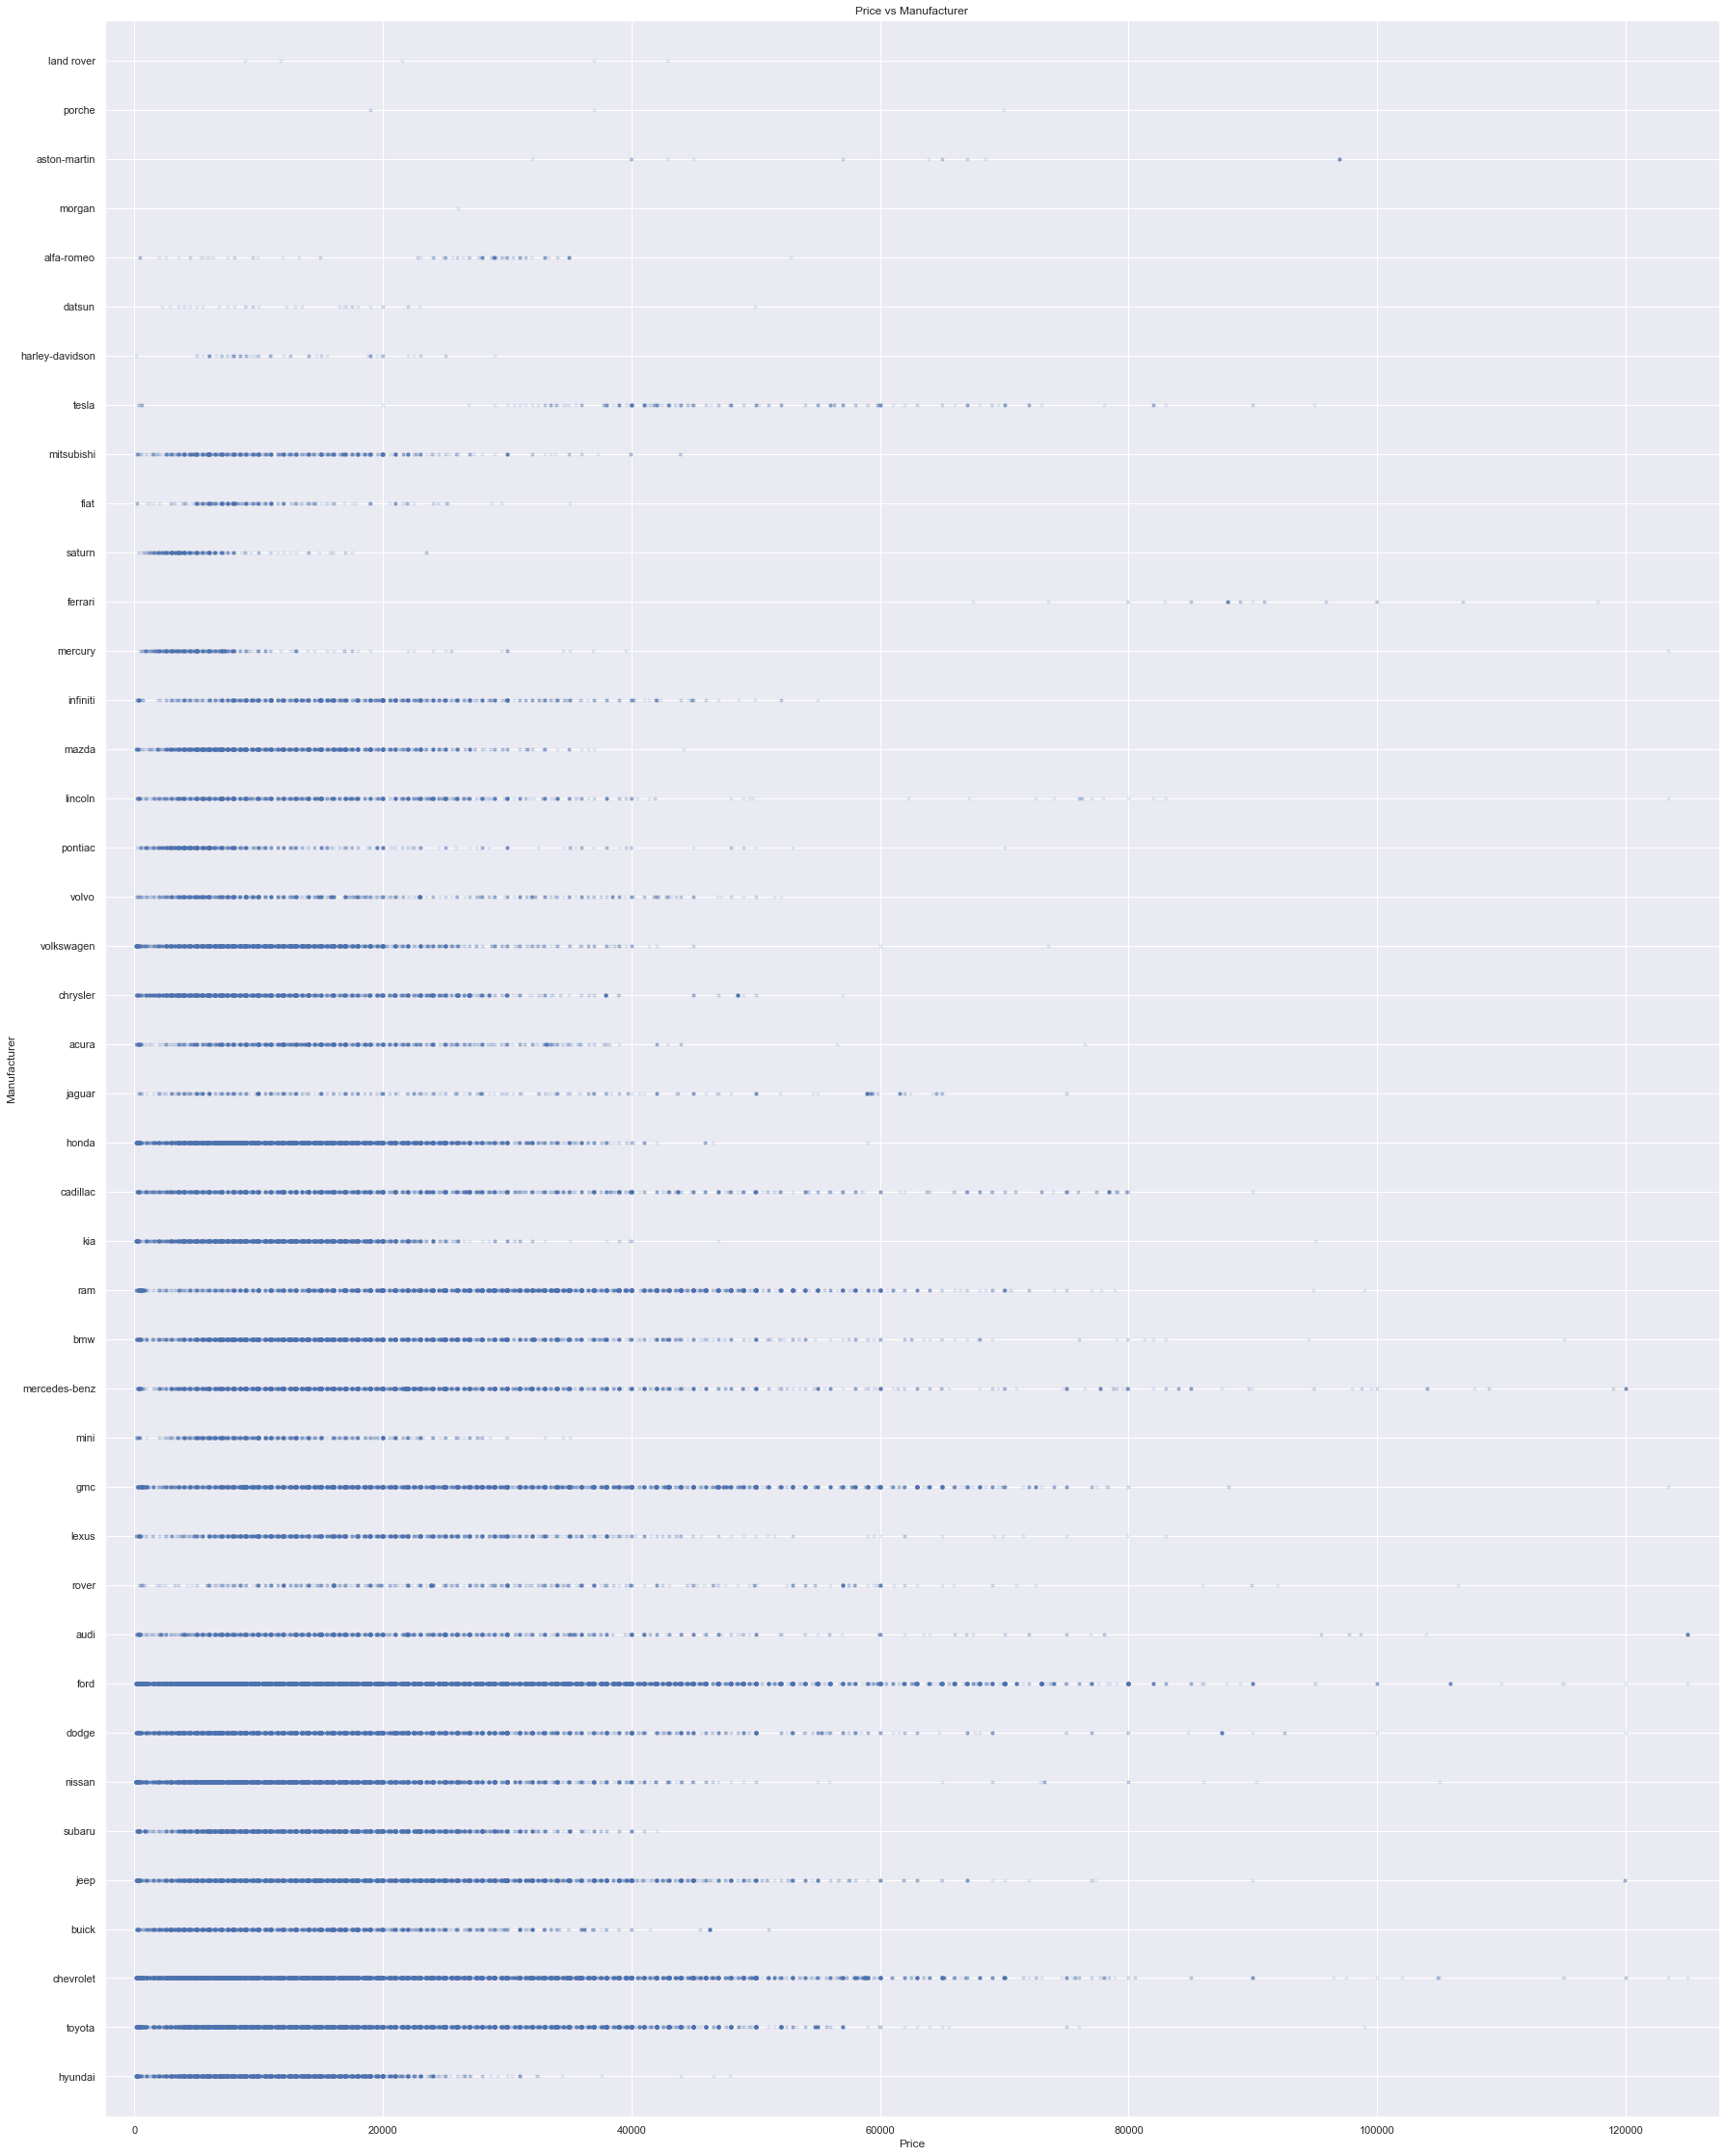

In [59]:
plt.plot(cars['price'],cars['manufacturer'], marker = '.', linestyle='none', alpha=0.1)
plt.margins(0.02)
plt.xlabel('Price')
plt.ylabel('Manufacturer')
plt.title('Price vs Manufacturer')

Manufacturer will be taken innto account because it seems to have an affect on price, which makes sense because several of them produce luxury or high price vehicles.  The final factor that will be taken into account is model.  This might be difficult because of the number of different models.  We should check the number first, to see if it is worth investing time in determining if it factors in price.

In [60]:
cars['model'].nunique()

15097

In [61]:
cars['model'].value_counts()

f-150                        3366
escape                       2113
silverado 1500               2031
1500                         1645
altima                       1556
                             ... 
coupe cooper s 2d               1
mkt ecoboost awd                1
grand cherokee 75k              1
f250 sd xl                      1
highlander hybrid xle awd       1
Name: model, Length: 15097, dtype: int64

A few things that I immediately notice are that there are many values that only have one listing, which would be impossible to model.  Also, I see silverado 1500 and 1500.  I do not know if those are the same or different vehicles, and there are likely many models that are the same but have slightly different names.  Model will note be reliable.

After running through all the data, I am able to focus on a handful of variables to model when it comes to price.  The most reliable was the mileage, followed by year. However the correlation between these two is pretty strong.  I will also take into account the state it is being sold, it's color, and the manufacturer.